## 전국 신규 민간 아파트 분양가격 동향
2015년 10월부터 2018년 7월까지
주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
https://www.data.go.kr/dataset/3035522/fileData.do
이 튜토리얼은 아파트 분양가에 대한 분석보다 파이썬 데이터 분석 방법을 배우는데 목적을 두고 있습니다.
이 튜토리얼에서는 파이썬 데이터분석 도구인 Pandas를 활용합니다. Pandas에 대한 간략한 소개는 다음의 판다스 10분 완성 문서를 참고해 주시면 좋습니다.
https://dataitgirls2.github.io/10minutes2pandas/
또 시각화 도구로는 grammer of graphics 문법을 활용할 수 있는 plotnine을 사용합니다.
이 튜토리얼은 데잇걸즈 2기와 파이콘 한국 2018에서 진행되기도 했습니다.
다음의 경로에서 온라인 분석도구인 Colaboratory의 사본을 생성해서 직접 실행하는 실습을 진행해 보실 수도 있습니다.
https://goo.gl/jSr7WU
데이터 다운로드 : https://goo.gl/oJydAv
!중요
버전과 한글폰트
한글폰트 사용하기 : http://corazzon.github.io/matplotlib_font_setting
* 2020 버전으로 파일만 다르게 해서 분석!

In [76]:
!pip show plotnine

Name: plotnine
Version: 0.7.1
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\programdata\anaconda3\lib\site-packages
Requires: mizani, descartes, scipy, matplotlib, statsmodels, numpy, patsy, pandas
Required-by: 


In [87]:
from IPython.display import Image #이미지 삽입

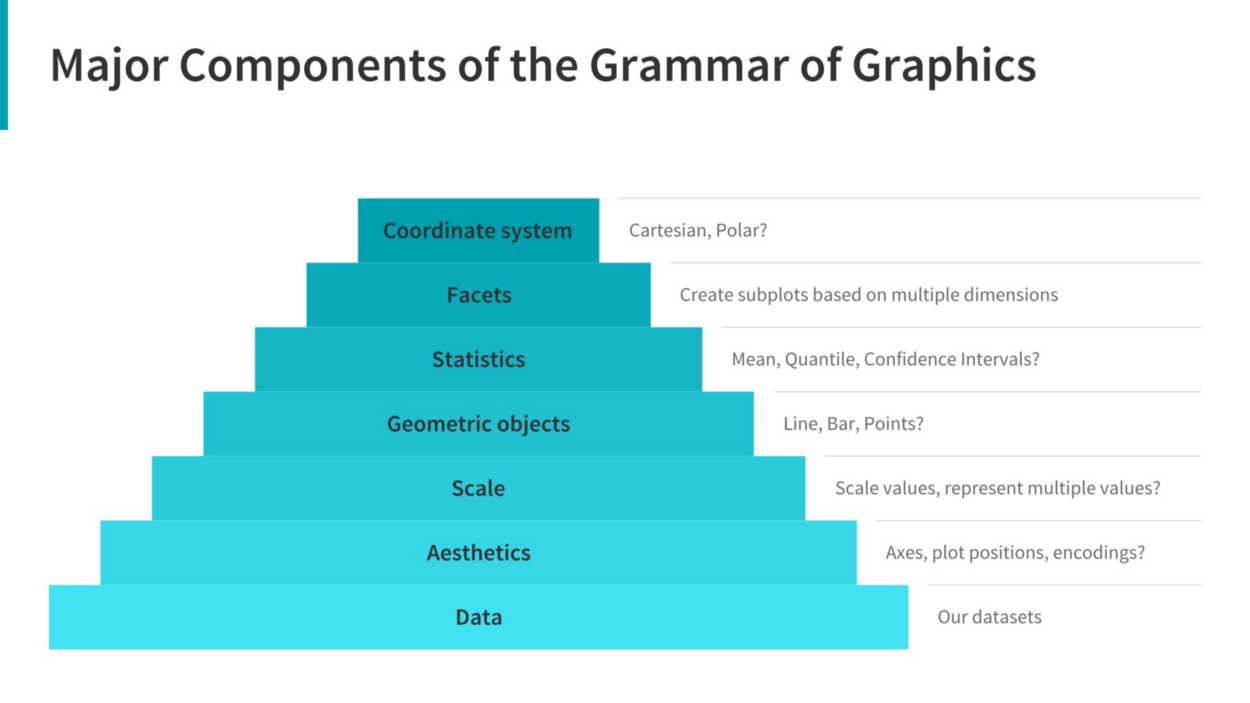

In [99]:
Image("C:/Users/User/Desktop/오늘코딩/12.png") # 예시

In [2]:
!pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: c:\programdata\anaconda3\lib\site-packages
Requires: matplotlib, numpy, scipy, seaborn
Required-by: 


In [3]:
import warnings # 경고를 무시해줘서 노트북을 보다 좀 깔끔하게 이용
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import re # 정규표현식
from plotnine import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False # 폰트 꺠짐 방지

# 설치된 한글 폰트 출력

import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmsy10',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'cmex10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'cmss10',
 'cmmi10',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'cmr10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmtt10',
 'DejaVu Sans',
 'STIXGeneral',
 'cmb10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'Corbel',
 'Segoe Print',
 'Arial',
 'MGungHeulim',
 'Corbel',
 'Segoe Print',
 'Segoe Script',
 'Palatino Linotype',
 'Candara',
 'Comic Sans MS',
 'Segoe UI',
 'Leelawadee UI',
 'Segoe UI',
 'Corbel',
 'Constantia',
 'HCR Dotum',
 'Ink Free',
 'Segoe UI',
 'Trebuchet MS',
 'Nirmala UI',
 'Constantia',
 'Segoe UI',
 'Calibri',
 'Arial',
 

In [6]:
# 현재 위치정보를 봅니다.
%pwd

'C:\\Users\\User\\Desktop\\오늘코딩'

In [7]:
# data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 두었습니다 해당 파일을 확인해 봅니다.
%ls 전*
#오늘코딩/apt_price/

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2ADA-EEDE

 C:\Users\User\Desktop\오늘코딩 디렉터리

2021-01-06  오후 06:56            50,997 전국 신규 민간 아파트 분양가격 동향.ipynb
               1개 파일              50,997 바이트
               0개 디렉터리  12,219,019,264 바이트 남음


In [8]:
pre_sale = pd.read_csv('C:/Users/User/Desktop/오늘코딩/민간아파트_분양가격_동향_20200331.csv', encoding='euc-kr') 
pre_sale.shape 
# 데이터 불러오고 데이터 행과 열 확인 
#보통 encoding utf-8인데 공공데이터는 인코딩을 안부르면 데이터를 못 부를 수도 있음 꼭 해당파일의 인코딩 지정 필수

(4590, 5)

In [9]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [10]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN
4589,제주,전용면적 102㎡초과,2020,3,3601


In [11]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠습니다.
pre_sale.info() # info 요약을 볼 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [12]:
pre_sale.dtypes # 어떤 데이터 형식인지 확인 가능

 

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [13]:
pre_sale.isnull().sum() # 결측치 값이 몇개인지? = 분양가격 314개

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    314
dtype: int64

In [14]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 맑은고딕 출력
# plt.rcParams['font.family'] = 'NanumGothic'

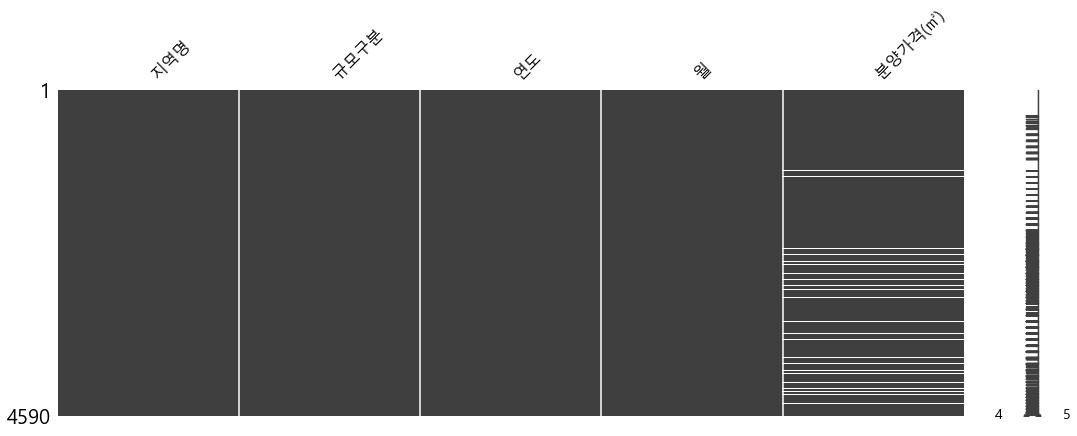

In [15]:
# 결측치를 시각화 
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))
# 위에 줄을 안하면 폰트가 깨져서 위에껄 필수적으로 실행해야함.

In [16]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [17]:
pre_sale_price = pre_sale['분양가격(㎡)'] # 전처리 전에 새로 데이터를 만들어줌

In [18]:
# 수치형 데이터로 데이터 전처리 
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해보자.
pre_sale['평당분양가격'] = pre_sale['분양가격'] *3.3

In [19]:
pre_sale.info() 
# 연도와 월은 str로 변형됨
# float데이터 형태로 분양가격 이랑 평당분양가격이 생성됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4590 non-null   object 
 1   규모구분     4590 non-null   object 
 2   연도       4590 non-null   object 
 3   월        4590 non-null   object 
 4   분양가격(㎡)  4276 non-null   object 
 5   분양가격     4260 non-null   float64
 6   평당분양가격   4260 non-null   float64
dtypes: float64(2), object(5)
memory usage: 251.1+ KB


In [20]:
pre_sale.dtypes # 데이터 타입만 검색

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [21]:
# 분양가격에 결측치가 많이 있다.
pre_sale.isnull().sum()
# 결측치가 늘어난 이유 수치형이 되면서 공백값도 결측치로 인식했기 때문에

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    314
분양가격       330
평당분양가격     330
dtype: int64

In [22]:
pre_sale.describe() # 수치형 데이터 기술통계 확인 가능

,분양가격,평당분양가격
count,4260.000000,4260.000000
mean,3270.160798,10791.530634
std,1300.362742,4291.197050
min,1868.000000,6164.400000
25%,2454.750000,8100.675000
50%,2890.000000,9537.000000
75%,3601.000000,11883.300000
max,13835.000000,45655.500000


In [86]:
pre_sale.describe?  # 도움말

<bound method NDFrame.describe of      지역명               규모구분    연도   월 분양가격(㎡)  분양가격  평당분양가격
0     서울                 전체  2015  10    5841 5,841  19,275
1     서울         전용면적 60㎡이하  2015  10    5652 5,652  18,652
2     서울   전용면적 60㎡초과 85㎡이하  2015  10    5882 5,882  19,411
3     서울  전용면적 85㎡초과 102㎡이하  2015  10    5721 5,721  18,879
4     서울        전용면적 102㎡초과  2015  10    5879 5,879  19,401
...   ..                ...   ...  ..     ...   ...     ...
4585  제주                 전체  2020   3    3955 3,955  13,052
4586  제주         전용면적 60㎡이하  2020   3    4039 4,039  13,329
4587  제주   전용면적 60㎡초과 85㎡이하  2020   3    3962 3,962  13,075
4588  제주  전용면적 85㎡초과 102㎡이하  2020   3     NaN   NaN     NaN
4589  제주        전용면적 102㎡초과  2020   3    3601 3,601  11,883

[4590 rows x 7 columns]>

In [24]:
pre_sale.describe(include=[np.object]) 
# object타임의 데이터도 요약을 해서 보여줌 랜덤하게 보여준다
# 데이터 4590 빈번하게 나오는 수 270 

,지역명,규모구분,연도,월,분양가격(㎡)
count,4590,4590,4590,4590,4276
unique,17,5,6,12,1766
top,인천,전체,2019,12,3395
freq,270,918,1020,425,18


In [25]:
# 2020년 데이터만 봅시다.
pre_sale_2020 = pre_sale.loc[pre_sale['연도']=='2020']
pre_sale_2020.shape
# pre_sale_2020 = pre_sale.loc[pre_sale['연도']==2020] # 수치형으로 데이터 안뜸 데이터 타입이 매우 중요함!
# pre_sale_2020.shape

(255, 7)

In [26]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전체                   918
전용면적 102㎡초과          918
전용면적 60㎡이하           918
전용면적 60㎡초과 85㎡이하     918
전용면적 85㎡초과 102㎡이하    918
Name: 규모구분, dtype: int64

In [28]:
pre_sale['지역명'].value_counts()

인천    270
전북    270
광주    270
세종    270
충북    270
강원    270
전남    270
서울    270
울산    270
대전    270
경남    270
경북    270
충남    270
부산    270
대구    270
경기    270
제주    270
Name: 지역명, dtype: int64

## 전국평균 분양가격
- groupby 와 pivot_table 활용하기

In [37]:
# ?를 통해 도움말 보기
pre_sale.groupby?

In [40]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T # 연도 순으로 분양가격과 평당분양가격을 정리

연도             2015   2016   2017   2018   2019   2020
분양가격   count    243    984    975    919    912    227
       mean   2,789  2,934  3,143  3,327  3,693  3,856
       std      977  1,071  1,111  1,186  1,563  1,755
       min    1,868  1,900  1,976  2,076  2,124  2,297
       25%    2,225  2,282  2,373  2,525  2,636  2,667
       50%    2,516  2,672  2,838  2,952  3,395  3,534
       75%    3,026  3,148  3,466  3,698  4,066  4,276
       max    7,092  8,096  7,887  8,098 12,728 13,835
평당분양가격 count    243    984    975    919    912    227
       mean   9,203  9,683 10,373 10,979 12,188 12,725
       std    3,224  3,536  3,665  3,914  5,159  5,792
       min    6,164  6,270  6,521  6,851  7,009  7,580
       25%    7,342  7,531  7,831  8,332  8,697  8,801
       50%    8,303  8,818  9,365  9,742 11,204 11,662
       75%    9,984 10,390 11,438 12,203 13,419 14,109
       max   23,404 26,717 26,027 26,723 42,002 45,656

## 규모별 전국 평균 분양가격

In [42]:
# ?로 도움말 보기
pre_sale.pivot_table?

In [43]:
pre_sale.pivot_table('평당분양가격','규모구분','연도')

연도,2015,2016,2017,2018,2019,2020
규모구분,,,,,,
전용면적 102㎡초과,"9,837","10,389","11,311","11,446","13,332","13,850"
전용면적 60㎡이하,"8,952","9,399","10,271","10,844","11,507","11,967"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,840","10,651","11,677","11,857"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,573","11,442","12,981","14,975"
전체,"8,893","9,293","9,927","10,676","11,603","11,879"


## 전국 분양가 변동금액
- 규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [55]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분']=='전체']
region_year = region_year_all.pivot_table('평당분양가격','지역명','연도').reset_index()
# 연도 지역명이 2행으로 생성되어서 연도는 행으로 지역명은 열로 표식되기 때문에 .reset_index() 을 써줘서 열로 표현가능하게 생성

In [56]:
region_year

연도,지역명,2015,2016,2017,2018,2019,2020
0,강원,"7,160","7,011","7,171","7,681","8,142","8,226"
1,경기,"10,377","11,220","11,841","13,186","14,469","14,829"
2,경남,"7,586","7,848","8,164","9,019","9,871","10,003"
3,경북,"7,171","7,361","7,803","8,505","8,857","9,002"
4,광주,"8,052","8,899","9,471","9,856","11,823","12,682"
5,대구,"9,232","10,310","11,507","12,076","13,852","14,672"
6,대전,"8,098","8,502","9,056","10,180","11,778","11,733"
7,부산,"10,307","10,430","11,664","12,998","13,116","12,934"
8,서울,"19,725","20,663","21,425","22,889","26,131","26,534"
9,세종,"8,750","8,860","9,133","10,355","11,079","11,411"


In [60]:
region_year['변동액']=(region_year['2018']-region_year['2015'].astype(int)) # int 형으로 데이터 수치 변환
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 4,485,725원이다.
상승액이 가장 작은 지역은 울산이며 평당 189,400원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,781,107원이다.


연도,지역명,2015,2016,2017,2018,2019,2020,변동액
0,강원,"7,160","7,011","7,171","7,681","8,142","8,226",522
1,경기,"10,377","11,220","11,841","13,186","14,469","14,829","2,809"
2,경남,"7,586","7,848","8,164","9,019","9,871","10,003","1,434"
3,경북,"7,171","7,361","7,803","8,505","8,857","9,002","1,335"
4,광주,"8,052","8,899","9,471","9,856","11,823","12,682","1,804"
5,대구,"9,232","10,310","11,507","12,076","13,852","14,672","2,844"
6,대전,"8,098","8,502","9,056","10,180","11,778","11,733","2,082"
7,부산,"10,307","10,430","11,664","12,998","13,116","12,934","2,692"
8,서울,"19,725","20,663","21,425","22,889","26,131","26,534","3,164"
9,세종,"8,750","8,860","9,133","10,355","11,079","11,411","1,605"


## 전국 분양가 변동금액
- 지금까지 2015년 10월에서 2018년 7월까지의 21개월간의 전국 신규 민간 아파트 분양가격 동향 파일을 요약해 봤습니다.
- Pandas를 통해 데이터를 가져오고 요약해 보고 엑셀과 비슷하게 피봇테이블을 그려보기도 하고 groupby를 사용해서 데이터를 요약해 보기도 했습니다.

### 시각화
- 데이터를 시각화 새보기에 앞서 앤스콤의 4인방을 보겠습니다.
- 아래 4개의 그래프는 다른 데이터로 그려졌습니다.
- 또 이 4개의 데이터는 평균,표준편차,상관계수가 같습니다. 하지만 시각화 했을 때 전혀 다른 데이터임을 확인할 수 있습니다.
- 이 앤스콤의 4인방은 요약된 데이터만으로 데이터를 판단할 수 없다는 것을 보여줍니다.
- 데이터 시각화의 중요성을 이야기할 대 자주 등장하는 예시입니다.
- Anscombe's quartet - Wikipedia
- The Datasaurus Dozen - Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing | Autodesk Research
- 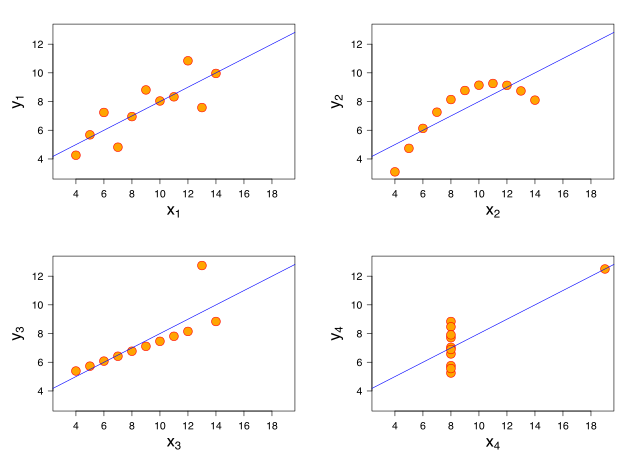

- A Grammar of Graphics for Python — plotnine
- tutorial
- ggplot2-cheatsheet
- 이미지 출처 : A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional…
- 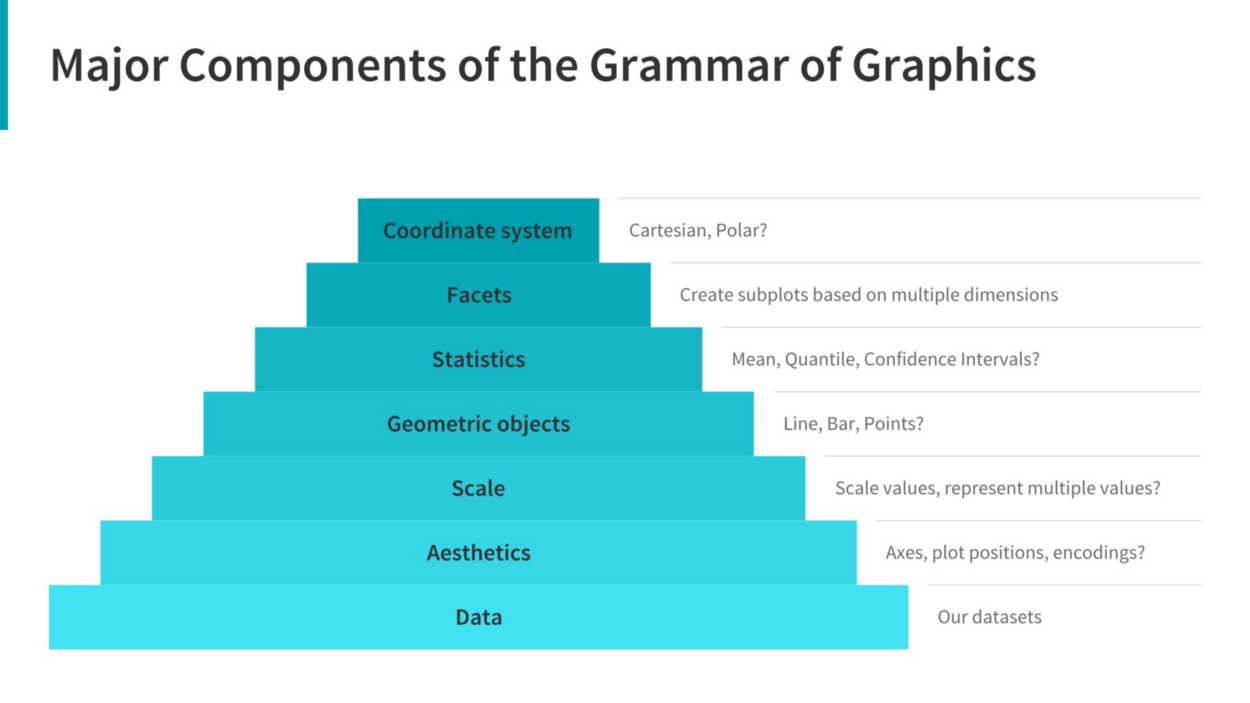


## 연도별 변동 그래프
- 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
- 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요합니다.
- 폰트는 나눔고딕이 설치되어 있어서 나눔고딕을 불러왔지만, 각자의 환경에 맞는 폰트를 가져와야 합니다.
- 한글폰트를 지정해 주지 않는다면 글자가 두부모양으로 깨져보이게 됩니다.

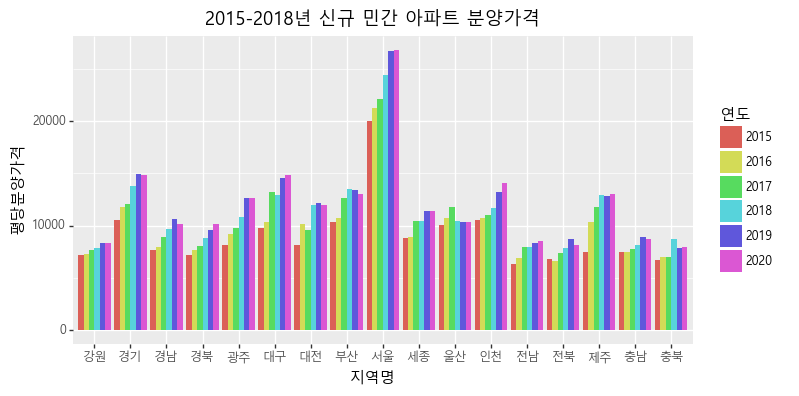

<ggplot: (146409755025)>

In [74]:
(ggplot(region_year_all, aes(x='지역명',y='평당분양가격',fill='연도'))
+ geom_bar(stat='identity', position='dodge')
+ ggtitle('2015-2018년 신규 민간 아파트 분양가격') # 제목
+ theme(text=element_text(family='Malgun Gothic'), # 맑은 고딕체가 아니면 한글폰트 깨짐 현상 주의
       figure_size=(8,4))
)

## 지역별 평당 분양가격 합계
- 아래 데이터로 어느정도 규모로 분양사업이 이루어졌는지를 봅니다.
- 전체 데이터로 봤을 때 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격대비로 나눠볼 필요가 있습니다.

In [64]:
pre_sale.pivot_table('평당분양가격','규모구분','지역명') 

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"8,579","14,870","10,339","9,210","11,236","13,287","14,875","13,260","23,771","10,251","9,941","14,502","8,314","8,225","10,604","8,705","8,219"
전용면적 60㎡이하,"7,610","13,399","8,723","7,919","9,641","12,105","9,326","11,428","23,448","9,318","9,397","11,348","7,294","7,647","14,062","7,910","7,149"
전용면적 60㎡초과 85㎡이하,"7,525","12,617","8,694","8,108","10,061","11,944","9,804","11,939","22,953","9,840","10,502","11,499","7,337","7,317","10,773","7,862","7,285"
전용면적 85㎡초과 102㎡이하,"8,818","13,885","10,049","8,774","9,296","11,292","9,078","12,212","26,938","9,932","8,861","11,611","7,942","8,326","10,709","9,221","8,391"
전체,"7,522","12,670","8,733","8,126","10,051","11,938","9,883","12,004","22,816","9,882","10,499","11,379","7,352","7,339","10,929","7,854","7,245"


## 규모별

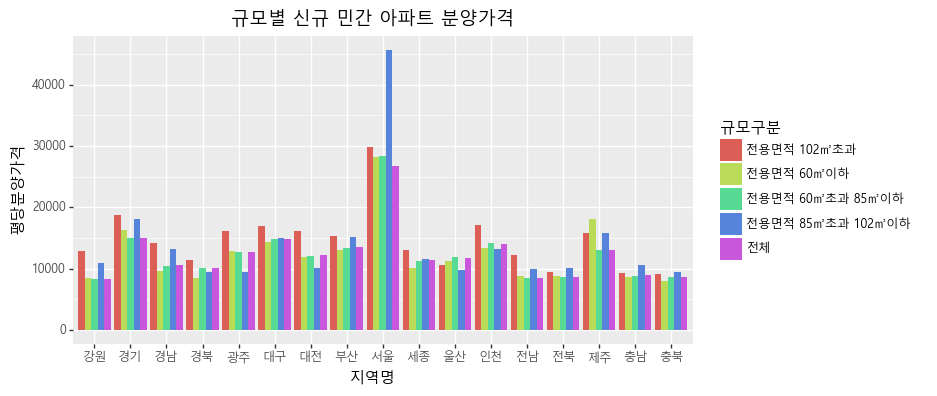

<ggplot: (146410066189)>

In [75]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(8, 4))
)

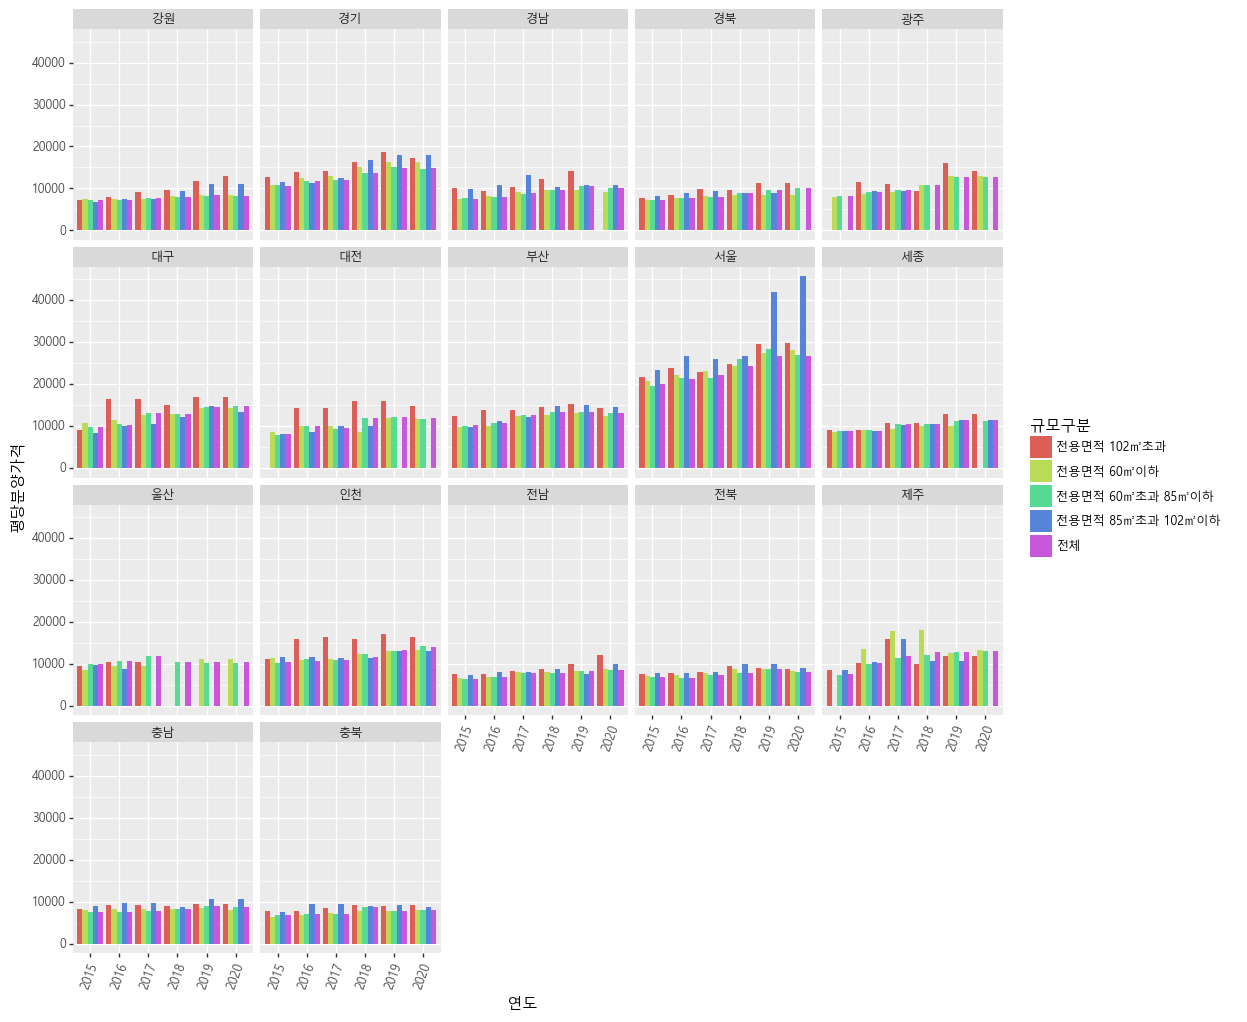

<ggplot: (146410262297)>

In [106]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')  # 위에 그림을 지역별로 서프플롯으로 그려줌
 + theme(text=element_text(family='Malgun Gothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

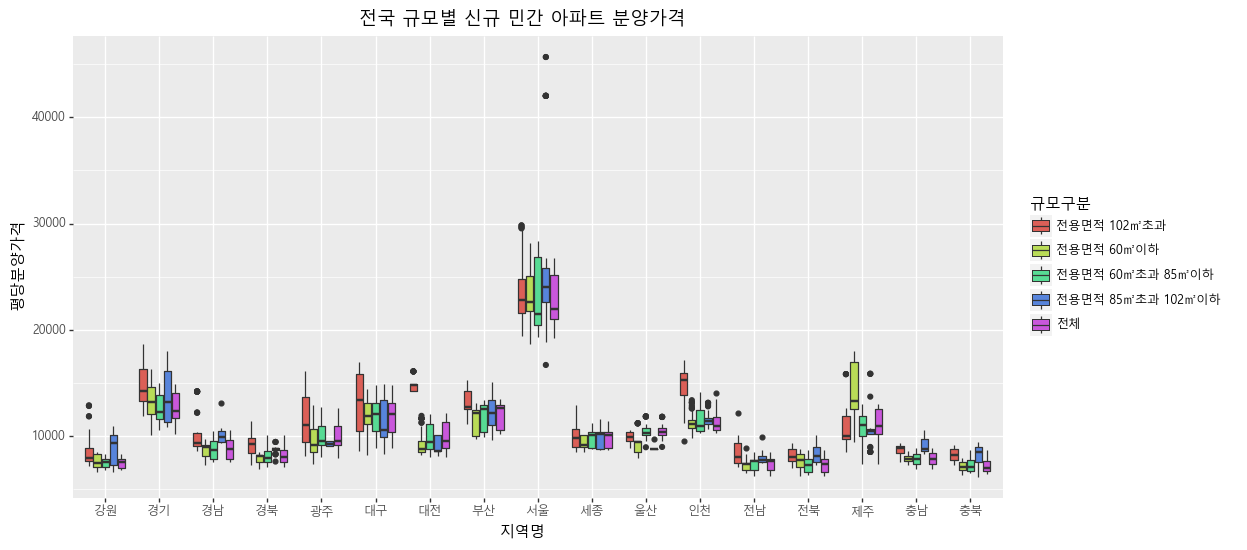

<ggplot: (146409483361)>

In [114]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(12, 6))
)

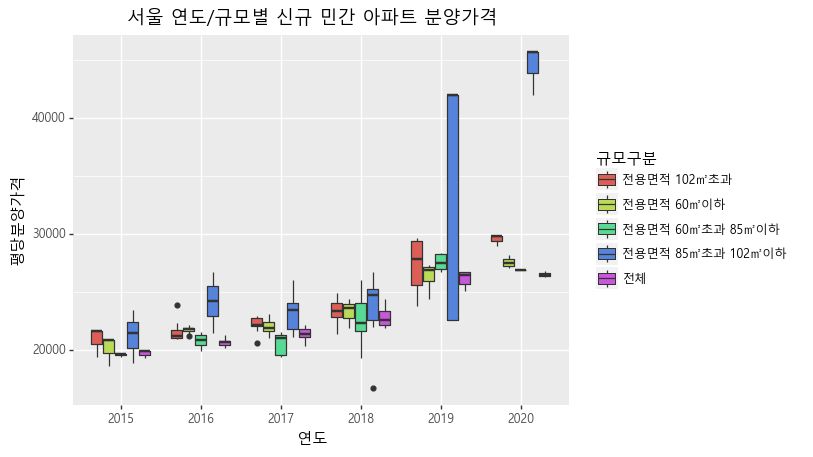

<ggplot: (146410278623)>

In [113]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

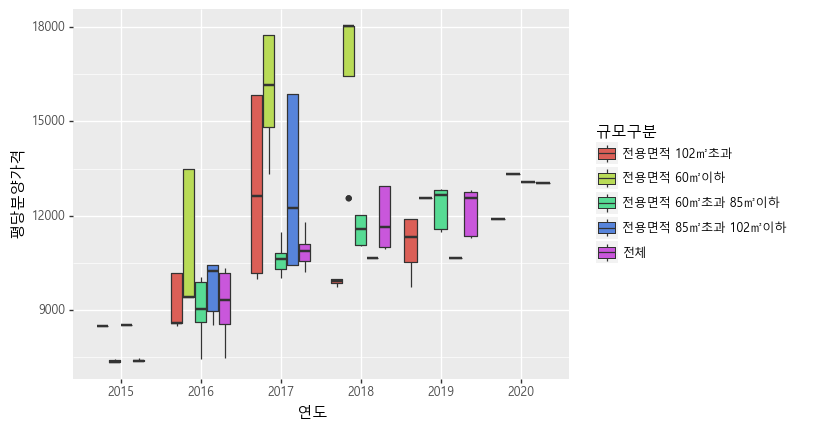

<ggplot: (146409401721)>

In [112]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

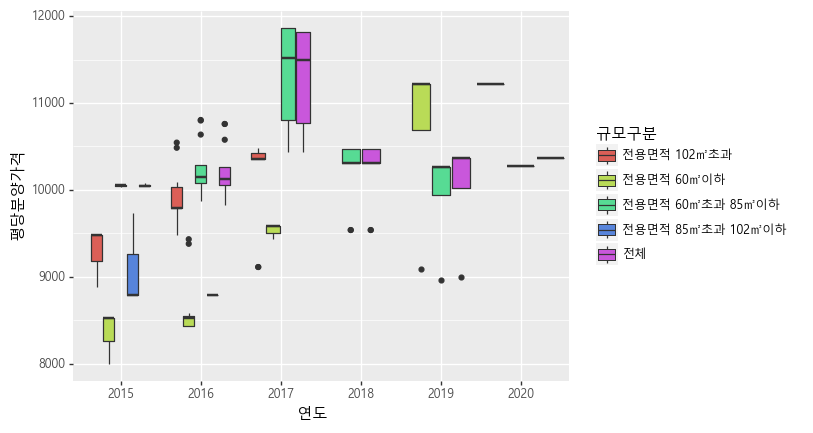

<ggplot: (146410825346)>

In [111]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 봅니다.
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보였습니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

# Tidy Data 만들기
- Tidy data - Wikipedia ## 2013년 12월~2015년 9월 3.3㎡당 분양가격
- 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있다.
- 지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv을 https://www.data.go.kr/dataset/3035522/fileData.do 에서 다운로드 받거나 다음의 경로에서 다운로드 받습니다. https://goo.gl/oJydAv

In [121]:
df = pd.read_csv('C:/Users/User/Desktop/오늘코딩/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0)
df.shape
# 아래는 읽어들인 csv파일에서 특정 행을 제외하여 읽는 방법이다.
# skiprows = [행1,행2,..] 를 이용하면 지정한 행을 제외한 나머지 행만 보여준다.
# header=None 은 칼럼 이름이 없다는 뜻이며, 만약 1번째 행이 칼럼 이름이라면 header=0 으로 지정해주면 됩니다.

(23, 27)

In [122]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있다.
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [117]:
year = df.iloc[0]
month = df.iloc[1]

In [118]:
# 결측치를 채워준다.
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [124]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다. # 월을 만들어주는 조건문
for i, y in enumerate(year):
    if i >2 and i <15:
        year[i] = ' '.join(['2014년',month[i]])
    elif i >=15:
        year[i] = ' '.join(['2015년',month[i]])
    elif i ==2:
        year[i] = ' '.join([year[i],month[i]])
    elif i ==1:
        year[i] = '시군구'
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [127]:
df.columns = year
df.columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비'],
      dtype='object', name=0)

In [126]:
df= df.drop(df.index[[0,1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [128]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐준다.
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [129]:
df['지역'] = df['구분'] + df['시군구']

In [130]:
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [133]:
df_2013_2015 = pd.melt(df, id_vars=['지역'],value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [134]:
df_2013_2015.columns = ['지역', '기간', '분양가'] # 열의 이름 수정
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [135]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())
# 연도와 월 추가

In [136]:
df_2013_2015.head() 

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


## 지역명 강원과 부산 정리

In [137]:
df_2013_2015['지역'].value_counts()

           44
수도권        22
전남         22
제주         22
광주         22
전북         22
대전         22
경남         22
경북         22
인천         22
6대광역시부산    22
울산         22
경기         22
전국         22
지방강원       22
세종         22
충남         22
충북         22
서울         22
대구         22
Name: 지역, dtype: int64

In [138]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))
df_2013_2015['지역'].value_counts()

       44
수도권    22
대구     22
전남     22
제주     22
광주     22
전북     22
대전     22
경남     22
경북     22
인천     22
울산     22
강원     22
경기     22
전국     22
세종     22
충남     22
충북     22
서울     22
부산     22
Name: 지역, dtype: int64

In [139]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 6월,"8,067",2014,3
freq,44,21,7,252,42


In [140]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      462 non-null    object
 1   기간      462 non-null    object
 2   분양가     462 non-null    object
 3   연도      462 non-null    object
 4   월       462 non-null    object
dtypes: object(5)
memory usage: 18.2+ KB


In [141]:
df_2013_2015['분양가격'] = df_2013_2015['분 양가'].str.replace(',', '').astype(int)

## 2013년 12월 부터 2015년 9월까지의 데이터 시각화 하기

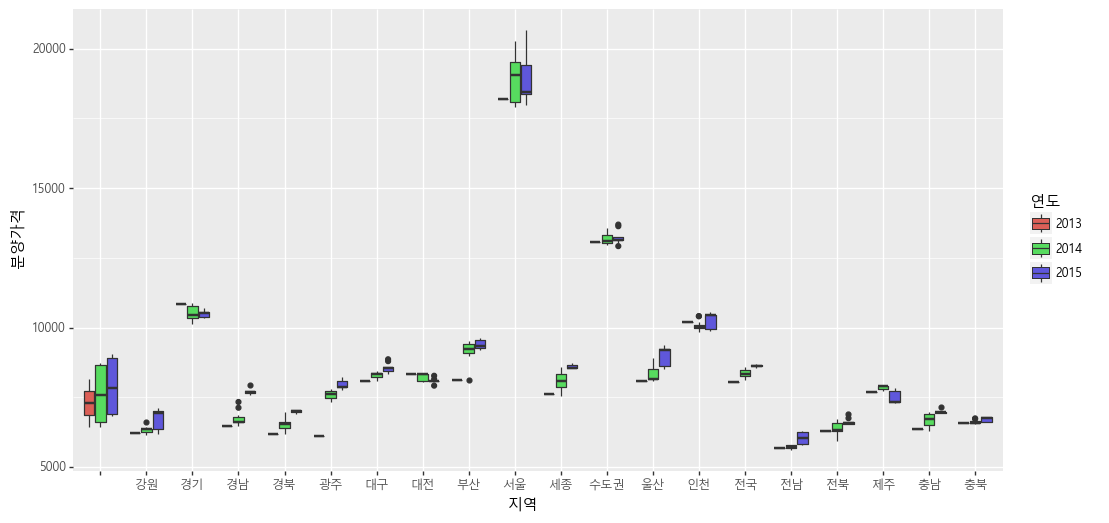

<ggplot: (146410570759)>

In [142]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(12, 6))
)

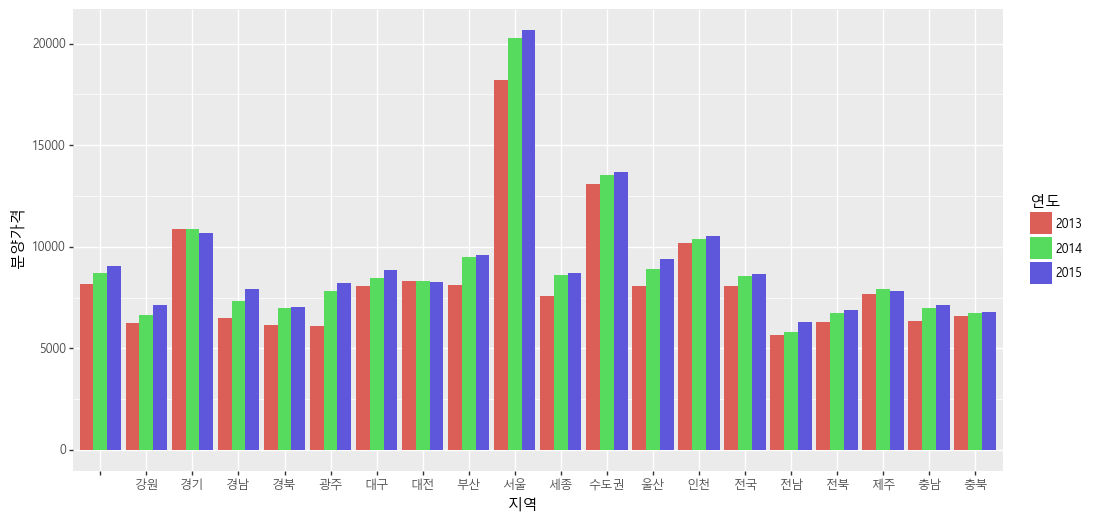

<ggplot: (146410070035)>

In [144]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(12, 6))
)

## 이제 2013년부터 2018년 7월까지 데이터를 합칠 준비가 됨

In [145]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체'] # 2013년에는 규모구분이 없어서 전체인 것만 합쳐준다.
print(df_2015_2018.shape)
df_2015_2018.head()

(918, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [146]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [147]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [148]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [149]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [150]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [151]:
df_2015_2018_prepare.describe()

,평당분양가격
count,909
mean,"10,365"
std,"3,788"
min,"6,300"
25%,"7,864"
50%,"9,550"
75%,"11,471"
max,"26,799"


In [152]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1380, 4)

In [153]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [154]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
4565,전북,2020,3,"8,144"
4570,전남,2020,3,"8,501"
4575,경북,2020,3,"8,432"
4580,경남,2020,3,"9,794"
4585,제주,2020,3,"13,052"


In [155]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique() # 지역명이 다른게 있는지 unique로 확인
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [156]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [157]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region
# 지역명 다른 것을 확인

['전국', '', '수도권']

In [158]:
df_2013_2018.shape

(1380, 4)

In [159]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [160]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

## 2013년 12월~2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

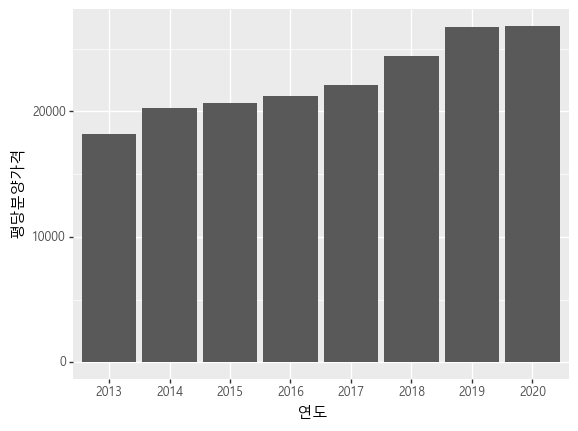

<ggplot: (146409205818)>

In [161]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='Malgun Gothic'))
)


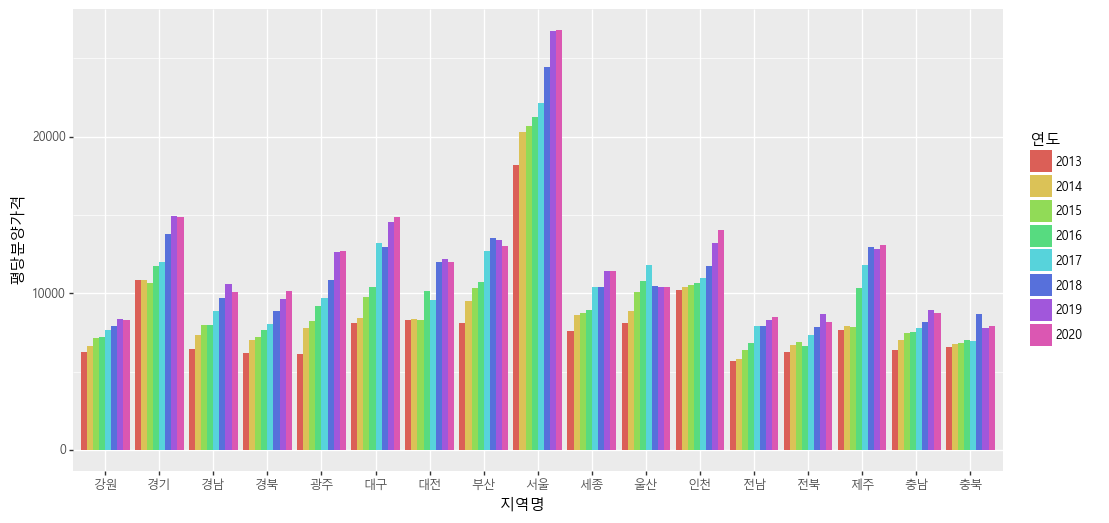

<ggplot: (146406920512)>

In [162]:
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(12, 6))
)

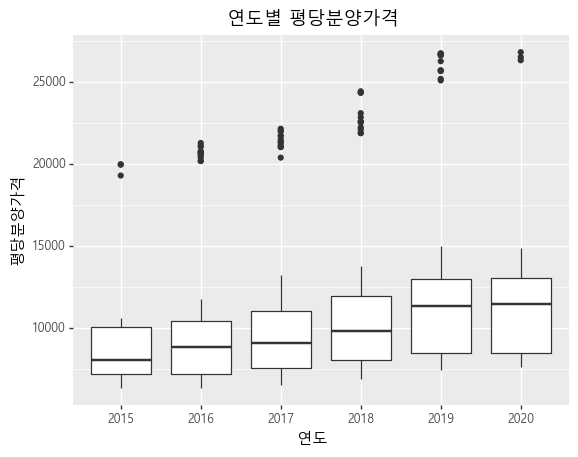

<ggplot: (146408025435)>

In [163]:
(ggplot(df_2015_2018_prepare)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

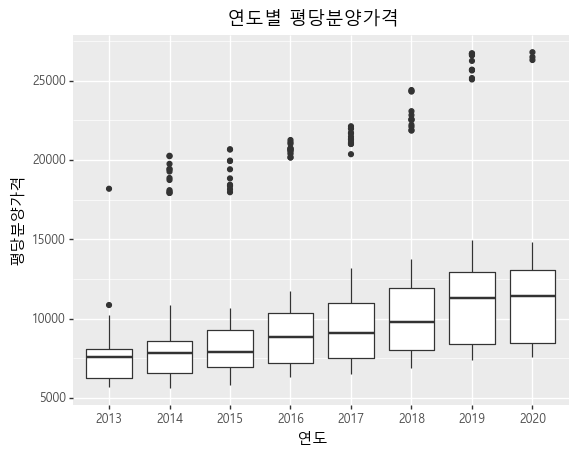

<ggplot: (146410040953)>

In [164]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

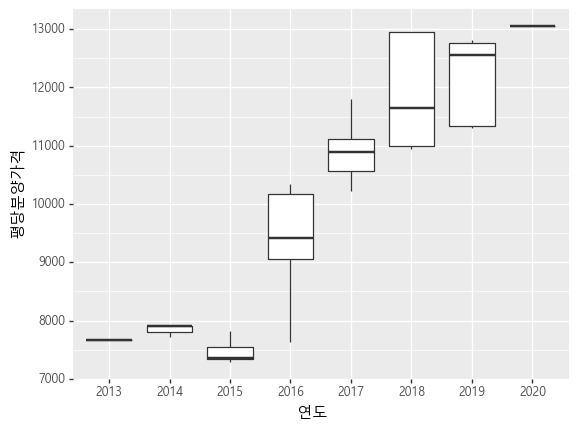

<ggplot: (146410578716)>

In [165]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

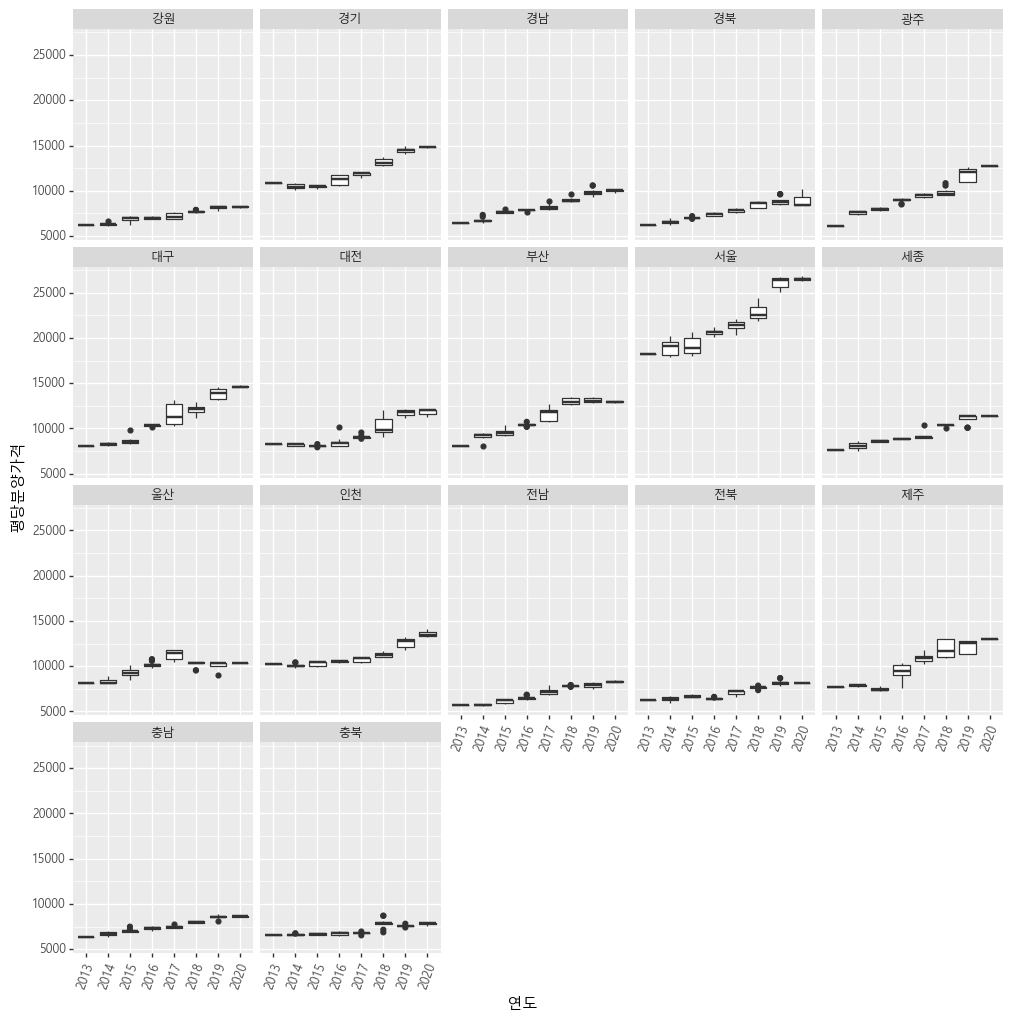

<ggplot: (146410055458)>

In [166]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(family='Malgun Gothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)